<h1>Chapter 3 | Data Exercise #2 | Used cars EDA | Distribution of variables</h1>

<p>2. Use the data on used cars collected from a classified ads site (according to Chapter 1 data exercise).</p>
<p>Assignments:</p>
<ul>
    <li>Visualize the distribution of price and the distribution of age, and compute their summary statistics.</li>
    <li>Are there extreme values? What would you do with them? Describe the two distributions in a few sentences.</li>
</ul>
<h2><b>1.</b> Load the data</h2>
<p>The data collection and cleaning steps were done in previous chapters (check data exercises for chapter  1 and 2). I will just store a copy of the cleaned dataset in this repository in case anyone wants to use it.</p>

In [1]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [8]:
# Current script folder
dirname = os.getcwd()

# Get location folders
data_in = f"{dirname}/data/raw/"
data_out = f"{dirname}/data/clean/"
output = dirname

In [9]:
used_cars = pd.read_csv(f"{data_in}WS_car_prices.csv")

In [10]:
used_cars.head()

,car_model,car_price,date,time,total_mileage,year,gear_type,fuel_type,url,city,area
0,Vendo HB20 2015,50000.0,2023-03-07,16:40,88000.0,2015,Manual,Flex,https://rs.olx.com.br/regioes-de-porto-alegre-...,Cachoeirinha,Chácara das Rosas
1,HYUNDAI HB20 2019/2020 1.0 12V FLEX VISION MANUAL,59900.0,2023-03-07,16:37,91007.0,2020,Manual,Flex,https://rs.olx.com.br/regioes-de-porto-alegre-...,Canoas,Marechal Rondon
2,Hyundai Hb20 1.0 12v Comfort,89690.0,2023-03-07,16:16,0.0,2023,Manual,Flex,https://rs.olx.com.br/regioes-de-caxias-do-sul...,Caxias do Sul,Nossa Senhora de Fátima
3,HB20 Evolution 1.0 Unico Dono 18000km,74900.0,2023-03-07,16:07,18000.0,2021,Manual,Flex,https://rs.olx.com.br/regioes-de-caxias-do-sul...,Getúlio Vargas,Nossa Senhora de Fátima
4,Hyundai Hb20 2022 1.0 tgdi flex evolution auto...,83900.0,2023-03-07,15:59,49790.0,2022,Automático,Flex,https://rs.olx.com.br/regioes-de-porto-alegre-...,Porto Alegre,Navegantes


<h2>2. Explore the data</h2>
<h3>2.1 Describing distributions | Price</h3>
<h4>2.1.1 Compute the summary statistics</h4>


In [12]:
def bowley_skewness(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    return (mean - median) / std

In [13]:
price_statistics = {
    "price_statistics": ["Mean", "Median", 
                   "Mode", "Min", "Max",
                   "IQR", "25th percentile", "75th percentile",
                   "Skewness", "Standard deviation",
                   "Number of observations", ],
    "Value": [
        used_cars["car_price"].mean(),
        used_cars["car_price"].median(),
        used_cars["car_price"].mode().iloc[0],
        used_cars["car_price"].min(),
        used_cars["car_price"].max(),
        used_cars["car_price"].quantile(0.75) - used_cars["car_price"].quantile(0.25),
        used_cars["car_price"].quantile(0.25),
        used_cars["car_price"].quantile(0.75),
        bowley_skewness(used_cars["car_price"]),
        used_cars["car_price"].std(),
        used_cars["car_price"].count(),
    ],
}

summary_table_price = pd.DataFrame.from_dict(price_statistics).round(1)
summary_table_price

,price_statistics,Value
0,Mean,315797.5
1,Median,55900.0
2,Mode,54900.0
3,Min,0.0
4,Max,82500000.0
5,IQR,16115.0
6,25th percentile,49875.0
7,75th percentile,65990.0
8,Skewness,0.1
9,Standard deviation,4060510.4


KeyboardInterrupt: 

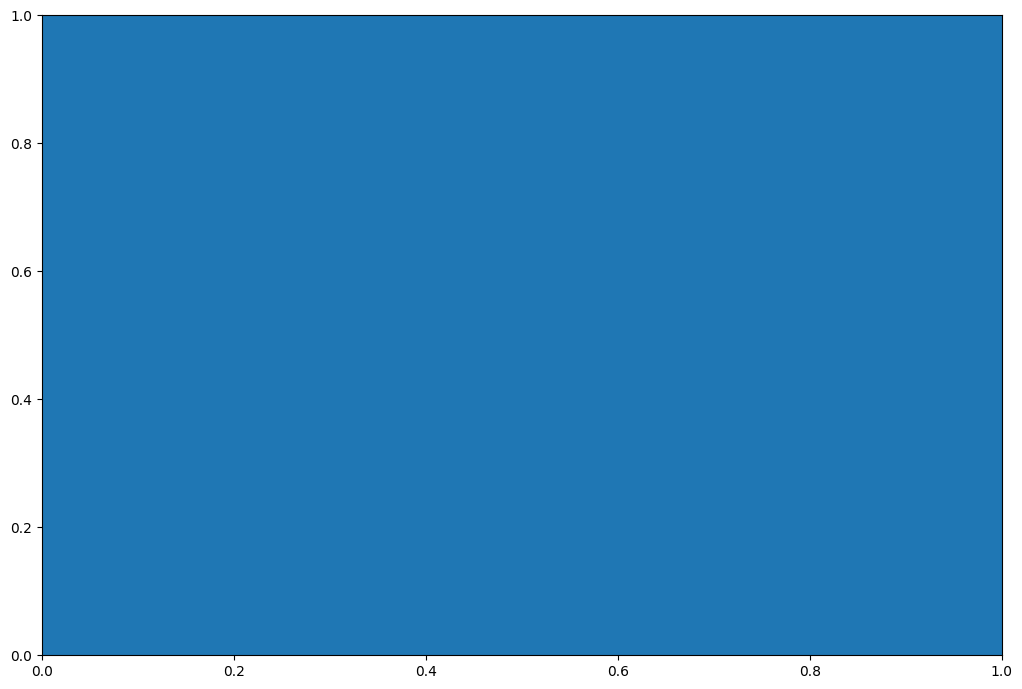

In [11]:
# Visualize the distribution of car_price, no filters
# Set the bin width
bin_width = 1000

# Create a new figure with adjusted padding
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.2, right=1, top=0.9, bottom=0.1)

# Plot the histogram
n, bins, patches = plt.hist(used_cars["car_price"], bins=int((used_cars["car_price"].max() - used_cars["car_price"].min()) / bin_width),
         edgecolor="white", zorder=2)

# Set x and y axis labels
plt.xlabel("Price (BRL)",
            fontsize=10, 
            color="black",
            loc="right",
            fontdict={"fontname": "Arial"},)
plt.ylabel("Frequency", 
            fontsize=10,
            color="black", 
            loc="top",
            fontdict={"fontname": "Arial"},)

# Set x and y ticks interval
plt.xticks(range(0, 17, 1), fontsize=8, color="#61677A")
plt.yticks(fontsize=8, color="#61677A")

# Change the color of the ticks and axes
tick_color = "#61677A"
plt.tick_params(axis="both", colors=tick_color)

# Add frequency count to each bar
total_data_points = used_cars["car_price"].count()
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    percentage = y / total_data_points * 100
    if percentage > 0:
        plt.annotate(f"{percentage:.1f}%", xy=(x, y), xytext=(0, 3), textcoords="offset points", 
                     ha="center", va="bottom", fontsize=8, color="#61677A")
    else:
        pass

# Add title to the chart
plt.title(f"Distribution of car ads by price, BRL",
          fontsize=14, 
          loc="left",
          fontdict={"fontname": "Arial"},
          pad=20)

# Add a light grid behind the bars
plt.grid(color="lightgray", linestyle="--", linewidth=0.5, zorder=1)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_color("#61677A")
plt.gca().spines["left"].set_color("#61677A")

plt.tight_layout()
plt.show()